<a href="https://colab.research.google.com/github/sintiasnn/movie-recomendation/blob/main/recomendation_system_coba_coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recomendation - Ni Putu Sintia Wati**

## **Project Overview**

Film menjadi salah satu hiburan yang tidak terkalahkan. Seiring perkembangan jaman, munculnya berbagai genre film serta layanan streaming yang beragam. Beragamnya genre membuat penikmat film bingung akan film yang ingin ditontonnya. Dalam hal ini, sistem rekomendasi menjadi salah satu cara untuk memberi saran kepada penikmat film tersebut. 

## **Business Understanding**
### **Problem Statements**
- Bagaimana layanan streaming dapat merekomendasikan film lain yang mungkin disukai dan belum pernah ditonton oleh penikmat film?

### **Goals**
- Menghasilkan sejumlah rekomendasi film yang sesuai dengan preferensi pengguna dan belum pernah ditonton sebelumnya dengan teknik collaborative filtering.

### **Solution statements**
pada kasus ini, kami mengajukan metode collaborative filtering sebagai solusi permasalahan diatas. 
-  **collaborative filtering**\
    collaborative filtering merupakan teknik penyeleksian pada sistem rekomendasi yang memanfaatkan kesamaan antara pengguna dan item secara bersamaan untuk memberi rekomendasi. Collaborative filtering terdiri dari dua kategori, yaitu: model based (metode berbasis model machine learning) dan memory based (metode berbasis memori). 


## **Data Understanding**

Data yang digunakan untuk projek kali ini yaitu movie lens small latest dataset yang diunduh dari kaggle. (https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset).

file yan terdapat pada dataset diatas adalah sebagai berikut:             
- links.csv               
- movies.csv              
- ratings.csv             
- tags.csv    

### **Data Loading**

Memuat data yang akan digunakan untuk modeling nanti. Pertama, data akan didownload melalui kaggle. Lalu file tersebut akan diekstrak agar file dapat digunakan. Tidak lupa juga untuk import library yang akan digunakan. Setelah itu, lalu kita tampilkan jumlah data pada masing-masing file dengan fungsi len(). 

In [ ]:
#Download dataset from Kaggle
! pip install kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shubhammehta21/movie-lens-small-latest-dataset

  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 64.4MB/s]


Seletah selesai pengunduhan dataset, kemudian ekstrak/unzip file tersebut. 

In [ ]:
#mengekstrak file 
!unzip /content/movie-lens-small-latest-dataset.zip

Archive:  /content/movie-lens-small-latest-dataset.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


Import library yang akan digunakan.

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# memuat file ke dalam variable
movies = pd.read_csv("/content/movies.csv")
links = pd.read_csv("/content/links.csv")
ratings = pd.read_csv("/content/ratings.csv")
tags = pd.read_csv("/content/tags.csv")

In [ ]:
# menampilkan jumlah data pada masing-masing file

print('jumlah film : ', len(movies.movieId.unique()))
print('jumlah link :', len(links.movieId.unique()))
print('jumlah rating : ', len(ratings.userId.unique()))
print('jumlah tag : ', len(tags.userId.unique()))

jumlah film :  9742
jumlah link : 9742
jumlah rating :  610
jumlah tag :  58


### **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) merupakan proses pengenalan data untuk menganalisis karakteristik, menemukan pola, anomali dan memeriksa asumsi data. 

**Unvariate EDA** 

Pada data loading, telah dideklarasikan variabel yang akan dipakai. Variable tersebut diantaranya :

- movies : informasi tentang film.
- links : informasi yang digunakan untuk menautkan film ke sumber lainnya. 
- ratings : penilaian pada film.
- tags : informasi (metadata) yang dibuat tentang film tersebut. 

tahap eksplorasi dilakukan untuk memahami variable serta menemukan korelasi antar variable. 

**Movies Variable**


In [ ]:
#cek informasi data movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
#menampilkan cuplikan isi data movies
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


Berdasarkan hasil diatas, terdapat 9742 entri. terdapat dua variable diantaranya, movieId, title, dan genres. 
- MovieId merupakan ID film, 
- title merupakan judul film, dan 
- genres merupakan jenis/gaya film. 

**Links Variable**

In [ ]:
#cek informasi data links
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [ ]:
#menampilkan cuplikan isi data links
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


Berdasarkan info diatas, terdapat 9742 entri pada imdbId dan 9734 untuk tmdbId. Terdapat beberapa variable diantaranya :  
- movieId untuk ID film, 
- imdbId untuk ID imdb (internet movie database), dan 
- tmdbId untuk ID tmdb (the movie database). 

**Ratings Variable**

In [ ]:
#cek informasi data ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# menampilkan isi data ratings
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


Berdasarkan info diatas, terdapat 100836 entri data. Terdapat beberapa variable diantaranya 
- userId untuk ID pengguna, 
- movieId untuk ID film, 
- rating untuk penilaian film yang secara umum rentang nilainya dari 0 hingga 5,
- Timestamp merupakan waktu default UTC yang terhitung sejak 1 januari 1970

Kita dapat check nilai minimun pada data rating dengan fungsi *describe()*

In [ ]:
#cek distribusi pada data rating
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Hasilnya, rating terendah yaitu 0 dan rating tertinggi yaitu 5. 

**Tags Variable**

In [ ]:
# cek informasi data tags
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


Berdasarkan informasi diatas, terdapat 3683 entri data. Terdapat beberapa variabel yang digunakan, diantaranya : 
- userId untuk ID user
- movieId untuk Id film
- tag untuk kata kunci yang disisipkan untuk pencarian film
- timestamp untuk waktu default UTC yang terhitung sejak 1 januari 1970

In [ ]:
# cek jumlah user, jumlah movie dan jumlah rating yang diberikan
# print('jumlah UserId : ', len(ratings.userId.unique()))
# print('jumlah movieId : ', len(ratings.movieId.unique()))
# print('jumlah data rating : ',len(ratings))

## **Data Preparation**

Data preparation bertujuan untuk menyiapkan data sebelum masuk ke proses modeling. Selain itu, data preparation juga berguna untuk meningkatkan akurasi saat training data. Pada dataset ini, yang akan kita lakukan yaitu menggabungkan dataset dengan fungsi *merge()* dan key movieId, menghapus missing value serta menurut dataset berdasarkan movieId serta menghapus hasil duplikat. 

In [ ]:
#menggabungkan dataset dengan key movieID
movies_all = pd.merge(ratings, movies, on='movieId')
movies_all.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
#cek missing value
movies_all.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
#membuat variabel sorting 
prep = movies_all
prep.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
137,382,1,4.5,1515162628,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
138,385,1,4.0,834691642,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
139,389,1,5.0,857934174,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
140,391,1,3.0,1032388077,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
92965,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
92966,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
92967,184,193585,3.5,1537109805,Flint (2017),Drama
92968,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
#hapus data duplikat
prep = prep.drop_duplicates('movieId')
prep

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


Selanjutnya, kita perlu melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi tolist() dari library numpy. Lalu cek jumlah masing-masing variable. 

In [ ]:
#konversi data series 'movieId', 'title', 'genres' ke dalam bentuk list lalu ceh jumlah datanya
movies_id = prep['movieId'].tolist()
movies_title = prep['title'].tolist()
movies_genre = prep['genres'].tolist()

print(len(movies_id))
print(len(movies_title))
print(len(movies_genre))

9724
9724
9724


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data movies_id, movies_title, dan movies_genre yang telah disiapkan sebelumnya.

In [ ]:
# membuat kamus data 
movies_final = pd.DataFrame({
    'id' : movies_id,
    'title' : movies_title,
    'genre' : movies_genre
})

movies_final

,id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,6,Heat (1995),Action|Crime|Thriller
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...
9719,160341,Bloodmoon (1997),Action|Thriller
9720,160527,Sympathy for the Underdog (1971),Action|Crime|Drama
9721,160836,Hazard (2005),Action|Drama|Thriller
9722,163937,Blair Witch (2016),Horror|Thriller


## **Model Development dengan Collaborative Filtering**

Collaborative filtering merupakan salah satu metode untuk membuat sistem rekomendasi. Teknik ini membutuhkan data rating dari user.

Goal proyek kali ini adalah menghasilkan rekomendasi sejumlah film yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, akan mengidentifikasi film-film yang mirip dan belum pernah ditonton oleh pengguna untuk direkomendasikan.


### Data Understanding

Pada penerapan model ini, file yang digunakan yaitu file **rating.csv**. Agar tidak tertukar dengan fitur rating yang digunakan sebelumnya, kita namakan file menjadi variabel *df*

In [ ]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Data Preparation


Pada tahap ini, perlu dilakukan persiapan data untuk menyandikan (encode) fitur ‘UserId’ dan ‘MovieId’ ke dalam indeks integer. 

In [ ]:
#mengubah userID menjadi list unique
userId_enc = df['userId'].unique().tolist()

#encoding userId
userId_enc_final = {x: i for i, x in enumerate(userId_enc)}

#encoding hasil encoding sebelumnya ke user
userId_enc_to_user = {i: x for i, x in enumerate(userId_enc)}

In [ ]:
#mengubah movieId menjadi list unique
movieId_enc = df['movieId'].unique().tolist()

#encoding movieId
movieId_enc_final = {x: i for i, x in enumerate(movieId_enc)}

#encoding angka ke movieId
movieId_enc_to_movie = {i: x for i, x in enumerate(movieId_enc)}

In [ ]:
#petakan UserID dan movieID yang telah di-encoding sebelumnya
df['user'] = df['userId'].map(userId_enc_final)
df['movie'] = df['movieId'].map(movieId_enc_final)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float.

In [ ]:
#jumlah user
num_user = len(userId_enc_final)
print(num_user)

#jumlah movie
num_movie = len(movieId_enc_to_movie)
print(num_movie)

#ubah rating menjadi float
df['rating'] = df['rating'].values.astype(np.float32)

#nilai minimun rating
min_rating = min(df['rating'])
print(min_rating)

#nilai maksimal rating
max_rating = max(df['rating'])
print(max_rating)

610
9724
0.5
5.0


Selanjutnya membagi Data Training dan data Valid. Sebelum membagi data menjadi data training dan data validasi, data diacak terlebih dahulu agar distribusi menjadi random.

In [ ]:
#mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


Selanjutnya, kita bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, kita perlu memetakan (mapping) data user dan film menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [ ]:
# buat variabel x untuk mencocokkan data user dan movie menjadi satu
x = df[['user', 'movie']].values

#buat variable y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [ ]:
#bagi data dengan ratio 80:20 (80% data uji dan 20% data valid)
dt_train = int(0.8*df.shape[0])
x_train, x_valid, y_train, y_valid = (
    x[:dt_train],
    x[dt_train:],
    y[:dt_train],
    y[dt_train:]
)

print(x,y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


### Proses Training
Pada tahap ini, model menghitung skor kecocokan antara pengguna dan film dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan film. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan film. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan film. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.


In [ ]:
class RecommenderNet(tf.keras.Model):

  # inisialisasi fungsi
  def __init__(self, num_user, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embedding movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias= layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:,0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [ ]:
model = RecommenderNet(num_user, num_movie, 50) # inisialisasi model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

Kemudian, lakukanlah proses training.

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_valid, y_valid)
)

Epoch 1/20
10084/10084 [==============================] - 63s 6ms/step - loss: 0.6263 - root_mean_squared_error: 0.2219 - val_loss: 0.6132 - val_root_mean_squared_error: 0.2067
Epoch 2/20
10084/10084 [==============================] - 58s 6ms/step - loss: 0.6047 - root_mean_squared_error: 0.1983 - val_loss: 0.6089 - val_root_mean_squared_error: 0.2017
Epoch 3/20
10084/10084 [==============================] - 59s 6ms/step - loss: 0.6000 - root_mean_squared_error: 0.1929 - val_loss: 0.6080 - val_root_mean_squared_error: 0.2006
Epoch 4/20
10084/10084 [==============================] - 58s 6ms/step - loss: 0.5973 - root_mean_squared_error: 0.1897 - val_loss: 0.6069 - val_root_mean_squared_error: 0.1992
Epoch 5/20
10084/10084 [==============================] - 57s 6ms/step - loss: 0.5959 - root_mean_squared_error: 0.1879 - val_loss: 0.6066 - val_root_mean_squared_error: 0.1986
Epoch 6/20
10084/10084 [==============================] - 58s 6ms/step - loss: 0.5947 - root_mean_squared_error: 0.

## **Evaluation**

Metrik yang digunakan pada kasus ini, yaitu RMSE (Root Mean Squared Error) yaitu menghitung rata-rata kuadrat kesalahan antara label dan prediksi. Berikut hasil perbandingan rmse dan loss. 

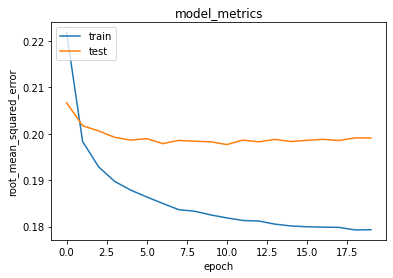

In [ ]:
#membuat plot
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Pengujian - Mendapatkan Rekomendasi Film**

Untuk mendapatkan rekomendasi film, ambil sampel user secara acak dan definisikan variabel **movie_not_watched** yang merupakan daftar film yang belum pernah ditonton oleh pengguna. 

Sebelumnya, pengguna telah memberi rating pada beberapa film yang telah mereka tonton. Kita menggunakan rating ini untuk membuat rekomendasi film yang mungkin cocok untuk pengguna. 

Variabel **movie_not_watched** diperoleh dengan menggunakan operator bitwise (~) pada variabel **movie_watched_by_user**.

In [ ]:
movie_df = movies_final
df = pd.read_csv('/content/ratings.csv')

#mengambil sample user
userId = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == userId]

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movieId_enc_final.keys()))
)
     
movie_not_watched = [[movieId_enc_final.get(x)] for x in movie_not_watched]
user_encoder = userId_enc_final.get(userId)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Selanjutnya, untuk memperoleh rekomendasi film, gunakan fungsi model.predict() dari library Keras. 

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movieId_enc_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(userId))
print('   ' * 9)
print('   ' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ': Genre', row.genre)

print('   ' * 8)
print('   ' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ': Genre', row.genre)

Showing recommendations for users: 91
                           
                           
Movie with high ratings from user
--------------------------------
Desperado (1995) : Genre Action|Romance|Western
Thing, The (1982) : Genre Action|Horror|Sci-Fi|Thriller
Pitch Black (2000) : Genre Horror|Sci-Fi|Thriller
Godfather, The (1972) : Genre Crime|Drama
Ginger Snaps (2000) : Genre Drama|Horror|Thriller
                        
                        
Top 10 movie recommendation
--------------------------------
Bridge on the River Kwai, The (1957) : Genre Adventure|Drama|War
Grand Day Out with Wallace and Gromit, A (1989) : Genre Adventure|Animation|Children|Comedy|Sci-Fi
Chinatown (1974) : Genre Crime|Film-Noir|Mystery|Thriller
Three Billboards Outside Ebbing, Missouri (2017) : Genre Crime|Drama
Ran (1985) : Genre Drama|War
Seventh Seal, The (Sjunde inseglet, Det) (1957) : Genre Drama
Touch of Evil (1958) : Genre Crime|Film-Noir|Thriller
Streetcar Named Desire, A (1951) : Genre Drama